<a href="https://colab.research.google.com/github/Soufiane4906/.Identity_ManageUserRoles/blob/main/Deep_learningCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from glob import glob
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow import keras




In [4]:
from google.colab import files
uploaded = files.upload()


Saving dataset.zip to dataset.zip


In [5]:
import zipfile
import os

# Spécifiez le chemin vers le fichier ZIP
zip_path = "dataset.zip"

# Décompression
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

# Changer de répertoire si nécessaire
os.chdir("/content/dataset")
print("Fichiers extraits : ", os.listdir())


Fichiers extraits :  ['dataset']


In [6]:
path_image="/content/dataset/dataset"

In [7]:
print(glob(path_image))

['/content/dataset/dataset']


In [8]:
#demarche :
#definir une fontion pour charger les images avec la sortie X, Y
#X :etant les images transfomées
#Y : les labels, etiquettes, les Classes
# image size= 128x128

def load_data(img_size=(128,128), path=''):
    X=[]
    Y=[]

    #recuperer le noms des dossier comme classes
    class_names= sorted([folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path,folder))])
    class_map= {name : idx for idx, name  in enumerate(class_names)}

    print("Class: ",class_map)

    #charger les Image associées a chaque classes
    for label_name, lable_idx in class_map.items():
        folder_path = os.path.join(path, label_name)
        images_files = glob(f"{folder_path}/*")     #si vous voulez charger que les image .jpg  =>/*.jpg

        for file_path in images_files:
            #charger une image et la trasnformer
            img= load_img(file_path, target_size=img_size)
            img_array = img_to_array(img)/255.0

            X.append(img_array)
            Y.append(lable_idx)

    X = np.array(X, dtype=np.float32)
    Y = np.array(Y, dtype=np.int32)

    return X, Y, class_map


In [9]:
X, Y, class_mapping=load_data(path="/content/dataset/dataset")

Class:  {'fake': 0, 'real': 1}


In [10]:
print(X.shape)

(103, 128, 128, 3)


In [11]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [12]:
from sklearn.model_selection import train_test_split

# Division des données : entraînement (70%) et temporaire (validation + test = 30%)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Division des données restantes (X_temp, Y_temp) en validation (20%) et test (10%)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.3333, random_state=42)

# Affichage des tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {len(X_train)} images")
print(f"Taille de l'ensemble de validation : {len(X_val)} images")
print(f"Taille de l'ensemble de test : {len(X_test)} images")


Taille de l'ensemble d'entraînement : 72 images
Taille de l'ensemble de validation : 20 images
Taille de l'ensemble de test : 11 images


In [17]:
from tensorflow import keras

def model(img_size=(128, 128)):
    input = keras.Input(shape=(img_size[0], img_size[1], 3))

    # Bloc 1
    x = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(input)
    x = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)

    # Bloc 2
    x = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)

    # Bloc 3
    x = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)

    # Bloc 4
    x = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = keras.layers.BatchNormalization()(x)

    # Flatten + Denses
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.5)(x)

    output = keras.layers.Dense(1, activation='sigmoid')(x)  # Changement ici

    return keras.Model(inputs=input, outputs=output)

# Compilation correcte pour une classification binaire
model = model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
#Afficher resumer (Summary)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 9,474,369 (36.14 MB)

 Trainable params: 9,472,193 (36.13 MB)

 Non-trainable params: 2,176 (8.50 KB)

In [20]:
epoch = 30
history = model.fit(X_train,Y_train, validation_data=(X_val, Y_val),
                             epochs= epoch,
                             batch_size = 16)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 55s 9s/step - accuracy: 0.6534 - loss: 0.9537 - val_accuracy: 0.5500 - val_loss: 1.5901
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 81s 8s/step - accuracy: 0.7373 - loss: 0.9965 - val_accuracy: 0.5500 - val_loss: 10.5648
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 85s 9s/step - accuracy: 0.8568 - loss: 0.4713 - val_accuracy: 0.5500 - val_loss: 17.6072
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 81s 9s/step - accuracy: 0.7598 - loss: 0.4373 - val_accuracy: 0.5500 - val_loss: 13.6118
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 81s 9s/step - accuracy: 0.8345 - loss: 0.4437 - val_accuracy: 0.5500 - val_loss: 13.0813
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 9s/step - accuracy: 0.8252 - loss: 0.3565 - val_accuracy: 0.5500 - val_loss: 8.3277
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 9s/step - accuracy: 0.9439 - loss: 0.1873 - val_accuracy: 0.6000 - val_loss: 6.9320
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.9294 - loss: 0.2162 - val_accuracy: 0.6000 - val_loss: 6.1133
Epoc

In [21]:
model.save("./model.h5")

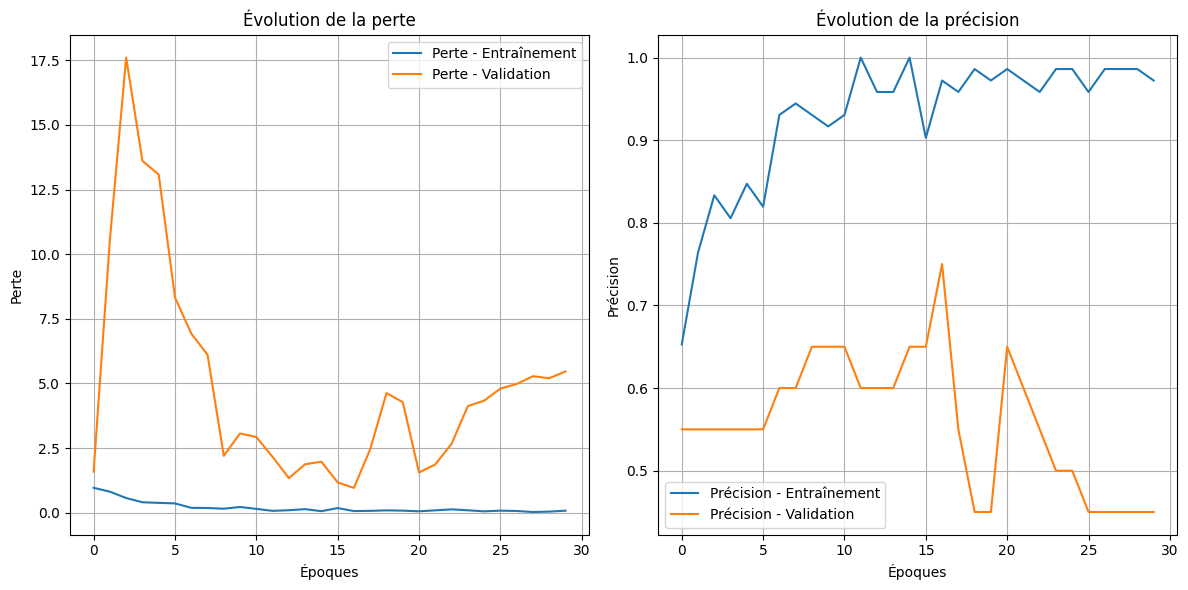

In [22]:
from matplotlib import pyplot as plt
# Tracer la courbe de perte
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Première courbe (1 ligne, 2 colonnes, 1er plot)
plt.plot(history.history['loss'], label='Perte - Entraînement')
plt.plot(history.history['val_loss'], label='Perte - Validation')
plt.title('Évolution de la perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.grid()

# Tracer la courbe de précision (si disponible)
if 'accuracy' in history.history:
    plt.subplot(1, 2, 2)  # Deuxième courbe (1 ligne, 2 colonnes, 2e plot)
    plt.plot(history.history['accuracy'], label='Précision - Entraînement')
    plt.plot(history.history['val_accuracy'], label='Précision - Validation')
    plt.title('Évolution de la précision')
    plt.xlabel('Époques')
    plt.ylabel('Précision')
    plt.legend()
    plt.grid()

# Afficher les courbes
plt.tight_layout()
plt.show()


In [29]:
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Conversion des étiquettes si nécessaire
if len(Y_train.shape) == 1:
    num_classes = len(np.unique(Y_train))
    Y_train = to_categorical(Y_train, num_classes=num_classes)
    Y_val = to_categorical(Y_val, num_classes=num_classes)

# Prédictions de probabilités
Y_pred_proba = model.predict(X_val)

# Multi-classes ou binaire
if Y_train.shape[1] > 1:  # Multi-classes
    num_classes = Y_train.shape[1]
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_val[:, i], Y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Tracer toutes les courbes ROC
    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f"Classe {i} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.title("Courbe ROC - Multi-classes")
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

else:  # Problème binaire avec sigmoïde
    fpr, tpr, _ = roc_curve(Y_val.ravel(), Y_pred_proba.ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.title("Courbe ROC - Binaire")
    plt.xlabel("Taux de faux positifs (FPR)")
    plt.ylabel("Taux de vrais positifs (TPR)")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


IndexError: index 1 is out of bounds for axis 1 with size 1

Class map:  {'fake': 0, 'real': 1}
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


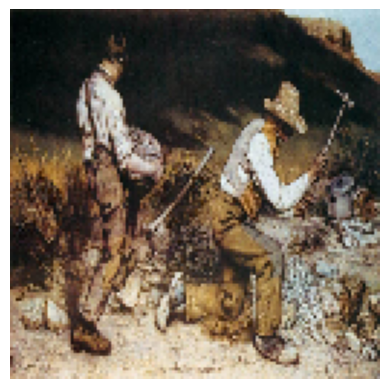

Classe prédite: fake


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image  # Assurez-vous d'importer ce module

# Charger le modèle VGG
model = load_model('./model.h5') #Pensez a changer le path vers le bon sur votre ordinateur

# Chemin du dossier où sont stockées les classes
path = "/content/dataset/dataset"  # Remplacez par le chemin de votre dossier
class_names = sorted([folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))])
class_map = {name: idx for idx, name in enumerate(class_names)}  # Mapping des classes

# Affichage des classes
print("Class map: ", class_map)

# Charger l'image à prédire
img_path = '/content/dataset/a.jpg'  # Remplacez par le chemin de l'image
img = image.load_img(img_path, target_size=(128, 128))  # Ajuster la taille selon votre modèle
img_array = image.img_to_array(img) / 255.0  # Normaliser l'image (valeurs entre 0 et 1)

# Ajouter une dimension pour simuler un lot d'images (batch)
img_array = np.expand_dims(img_array, axis=0)

# Faire la prédiction
predictions = model.predict(img_array)

# Affichage de l'image avec matplotlib
plt.imshow(img)
plt.axis('off')  # Cacher les axes pour une meilleure visibilité
plt.show()

# Obtenir la classe prédite
predicted_class_idx = np.argmax(predictions, axis=1)  # Classe prédite (index)
predicted_class_name = list(class_map.keys())[list(class_map.values()).index(predicted_class_idx[0])]  # Nom de la classe prédite

# Affichage de la classe prédite
print(f"Classe prédite: {predicted_class_name}")


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Conversion des étiquettes si elles ne sont pas catégoriques
if len(Y_test.shape) == 1:
    num_classes = len(np.unique(Y_test))
    Y_test = to_categorical(Y_test, num_classes=num_classes)

# Prédictions des classes pour l'ensemble de test
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Classes prédites
Y_test_classes = np.argmax(Y_test, axis=1)  # Classes réelles

# Calcul des métriques
precision = precision_score(Y_test_classes, Y_pred_classes, average="weighted")
recall = recall_score(Y_test_classes, Y_pred_classes, average="weighted")
f1 = f1_score(Y_test_classes, Y_pred_classes, average="weighted")

# Affichage des résultats
print("Évaluation des performances du réseau :")
print(f"Précision : {precision:.4f}")
print(f"Rappel : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

# Rapport de classification complet
print("\nRapport de classification :")
print(classification_report(Y_test_classes, Y_pred_classes))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Évaluation des performances du réseau :
Précision : 0.5289
Rappel : 0.7273
F1-Score : 0.6124

Rapport de classification :
              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       0.00      0.00      0.00         3

    accuracy                           0.73        11
   macro avg       0.36      0.50      0.42        11
weighted avg       0.53      0.73      0.61        11



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m